In [29]:
import numpy as np
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [30]:
df = pd.read_csv("cardio_train_clean.csv")
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68562 entries, 0 to 68561
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68562 non-null  int64  
 1   age          68562 non-null  int64  
 2   gender       68562 non-null  int64  
 3   height       68562 non-null  int64  
 4   weight       68562 non-null  float64
 5   ap_hi        68562 non-null  int64  
 6   ap_lo        68562 non-null  int64  
 7   cholesterol  68562 non-null  int64  
 8   gluc         68562 non-null  int64  
 9   smoke        68562 non-null  int64  
 10  alco         68562 non-null  int64  
 11  active       68562 non-null  int64  
 12  cardio       68562 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.8 MB


(68562, 13)

/tmp/ipykernel_68632/2847625935.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


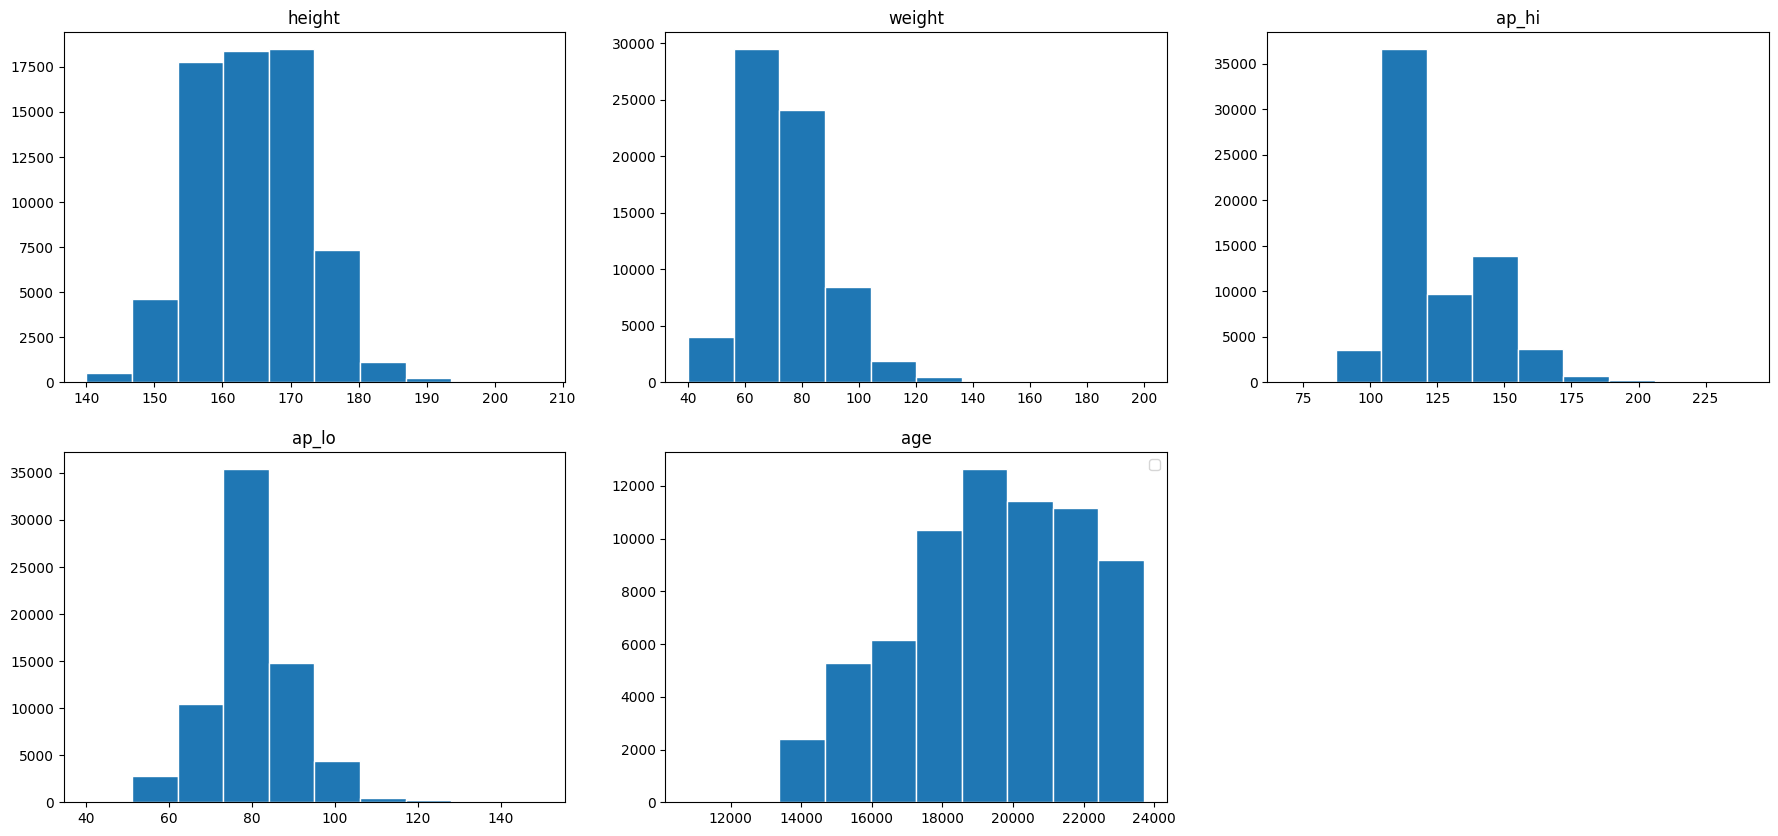

In [31]:
X_num = df[['height', 'weight', 'ap_hi', 'ap_lo', 'age']]
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns=X_num.columns)

plt.figure(figsize=(22, 10))
cols = ['height', 'weight', 'ap_hi', 'ap_lo', 'age']
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)  
    plt.hist(X_num[col], bins=10, edgecolor='white')
    plt.title(col)
plt.legend()
plt.show()

Nous partons d'une logique "valeur élevé, incidence négative". Plus le choléstérol est élevé, plus c'est "grave"(1, 2, 3), si on fume ou bois c'est "pas bien"(0, 1). Cependant, pour l'activité phisique, il faut inverser les 0 et 1 pour faire respecter notre logique.

In [32]:
df['active'] = 1 - df['active']

Dans le dataframe original, les 2 représentait les Hommes et les 1, les Femmes. Nous allons effectuer un OneHotEncoder car c'est une donnée Cardinale. Dès à présent, nous aurons gender_female et gender_male pour plus de clarté.

In [33]:
df['gender'] = df['gender'].replace({1: 'female', 2: 'male'})
df['gender']

0          male
1        female
2        female
3          male
4        female
          ...  
68557      male
68558    female
68559      male
68560    female
68561    female
Name: gender, Length: 68562, dtype: object

In [34]:
X_categorical = df[['gender']]
encoder = OneHotEncoder(sparse_output=False)

X_cat_encoded = pd.DataFrame(encoder.fit_transform(X_categorical), columns=encoder.get_feature_names_out())
X_cat_encoded.head()

,gender_female,gender_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


Maintenant, notre base de donnée est apte à faire de la modélisation. Il ne nous reste plus qu'à passer au module machine learning.

In [37]:
# Colonnes à ajouter depuis df original
others_data = df[['cholesterol', 'smoke', 'alco', 'gluc']].reset_index(drop=True)

# Reconstitution de la matrice X complète
X = pd.concat([
    X_num_scaled.reset_index(drop=True), 
    X_cat_encoded.reset_index(drop=True), 
    df[['active']].reset_index(drop=True),
    others_data,
    df['cardio'].reset_index(drop=True)
], axis=1)

print("Shape finale :", X.shape)
X.head()


Shape finale : (68562, 13)


,height,weight,ap_hi,ap_lo,age,gender_female,gender_male,active,cholesterol,smoke,alco,gluc,cardio
0,0.452536,-0.851826,-0.993313,-0.142923,-0.434097,0.0,1.0,0,1,0,0,1,0
1,-1.086331,0.761602,0.799028,0.904169,0.309546,1.0,0.0,0,3,0,0,1,1
2,0.067819,-0.711528,0.201581,-1.190015,-0.246058,1.0,0.0,1,3,0,0,1,1
3,0.580775,0.551155,1.396475,1.951260,-0.746143,0.0,1.0,0,1,0,0,1,1
4,-1.086331,-1.272720,-1.590760,-2.237107,-0.806526,1.0,0.0,1,1,0,0,1,0


In [38]:
X.to_csv('cardio_regression.csv', index=False)